In [10]:
pip install sentence-transformers matplotlib supabase requests python-dotenv google-generativeai


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached google_generativeai-0.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_ai_generativelanguage-0.6.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached google_auth-2.29.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached proto_plus-1.23.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached googleapis_common_protos-1.63.0-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
  Using cached pyasn1_modules-0.4.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached httplib2-0.22.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached google_auth_httplib2-0.2.0-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl.metadata (2.9 kB)
  Using cached pyasn1-0.6.0-py2.py3-none-any.whl.metadata (8.3 kB)
INFO: pip is looking at multiple versions

In [2]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from supabase import create_client, Client
import datetime


/Users/krantlee/Documents/Study/University of Washington/TECHIN 510/Lab 7/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = SentenceTransformer('Supabase/gte-small')

No sentence-transformers model found with name Supabase/gte-small. Creating a new one with MEAN pooling.
/Users/krantlee/Documents/Study/University of Washington/TECHIN 510/Lab 7/venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/krantlee/Documents/Study/University of Washington/TECHIN 510/Lab 7/venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [4]:
# Example data
data = [
    {"Time": "2024-01-01 10:00:00", "Temperature": 22.5, "Humidity": 55},
    {"Time": "2024-01-02 12:00:00", "Temperature": 21.0, "Humidity": 60},
    {"Time": "2024-01-03 14:00:00", "Temperature": 20.5, "Humidity": 58}
]

# Turning data into strings
table_data = ["Time: {}, Temperature: {}, Humidity: {}".format(row["Time"], row["Temperature"], row["Humidity"]) for row in data]

# encoding the data
embeddings1 = model.encode(table_data)


In [11]:
# User input simulation
start_date = "2024-01-01"
end_date = "2024-01-04"

# turning user input into datetime objects
start = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# searching for the data within the user input time range
filtered_data = [row for row in data if start <= datetime.datetime.strptime(row["Time"], "%Y-%m-%d %H:%M:%S") <= end]

# Turning data into strings
table_data = ["Time: {}, Temperature: {}, Humidity: {}".format(row["Time"], row["Temperature"], row["Humidity"]) for row in filtered_data]
embeddings1 = model.encode(table_data)

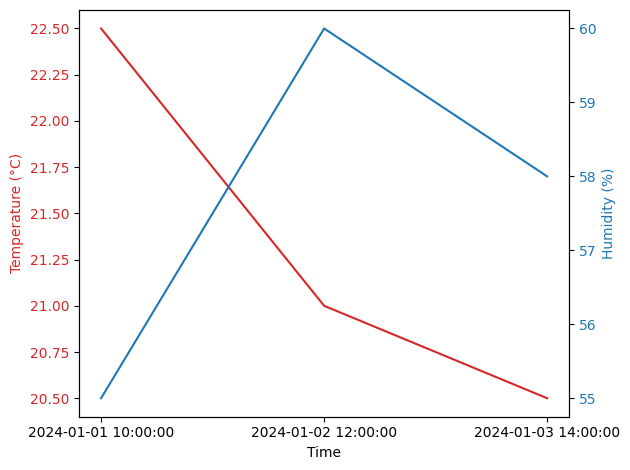

In [8]:
# Extracting the data
times = [row["Time"] for row in filtered_data]
temperatures = [row["Temperature"] for row in filtered_data]
humidities = [row["Humidity"] for row in filtered_data]

# Creating the plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(times, temperatures, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating the second y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Humidity (%)', color=color)
ax2.plot(times, humidities, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [37]:
from dotenv import load_dotenv
import os
import google.generativeai as genai

model = genai.GenerativeModel('gemini-pro')

load_dotenv()
GOOGLE_API_KEY=os.getenv('Gemini_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# 创建 Prompt
query = "\n".join(table_data)
# 生成新的 Prompt
prompt = f"""
Create a Python code using Matplotlib to visualize the following data as line plots:
{query}

Requirements:
- The x-axis should represent the 'Time'.
- The first y-axis should represent 'Temperature'.
- The second y-axis should represent 'Humidity'.
- Use separate colors for Temperature and Humidity curves.
"""


response = model.generate_content(prompt)
# 打印整个 response 对象，查看它的结构
final = response.text
print(final)

# 提取生成的代码文本
candidates = final.result['candidates']
if candidates:
    generated_content = candidates[0]['content']['parts'][0]['text']
    print("Generated code:\n", generated_content)
else:
    print("No candidates found.")

# 移除代码块标记
generated_code = generated_content.replace("```python\n", "").replace("\n```", "")
print("Cleaned code:\n", generated_code)







```python
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe from the data
df = pd.DataFrame({
    'Time': ['2024-01-01 10:00:00', '2024-01-02 12:00:00', '2024-01-03 14:00:00'],
    'Temperature': [22.5, 21.0, 20.5],
    'Humidity': [55, 60, 58]
})

# Convert the 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Set the x-axis to 'Time'
plt.figure(figsize=(10,5))
plt.plot(df['Time'], df['Temperature'], color='blue')

# Add a second y-axis for 'Humidity'
plt.twinx()
plt.plot(df['Time'], df['Humidity'], color='red')

# Set the labels for the axes
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.set_ticks_position('right')
plt.ylabel('Humidity (%)')

# Show the plot
plt.title('Temperature and Humidity over Time')
plt.show()
```


AttributeError: 'str' object has no attribute 'result'